In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_data=pd.read_csv("train_data.csv")

In [3]:
test_data=pd.read_csv("test_data.csv")

In [4]:
test_hidden_data=pd.read_csv("test_data_hidden.csv")

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [7]:
test_hidden_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
 7   sentiment            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [8]:
# Handle missing values
train_data['reviews.title'].fillna('', inplace=True)
test_data['reviews.title'].fillna('', inplace=True)
test_hidden_data['reviews.title'].fillna('', inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        4000 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [11]:
test_hidden_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        1000 non-null   object
 7   sentiment            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [12]:
# Summary statistics
print("Summary Statistics:")
train_data.describe()

Summary Statistics:


,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,4000,4000
unique,23,1,23,4,638,3598,2607,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,100,3749


# EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

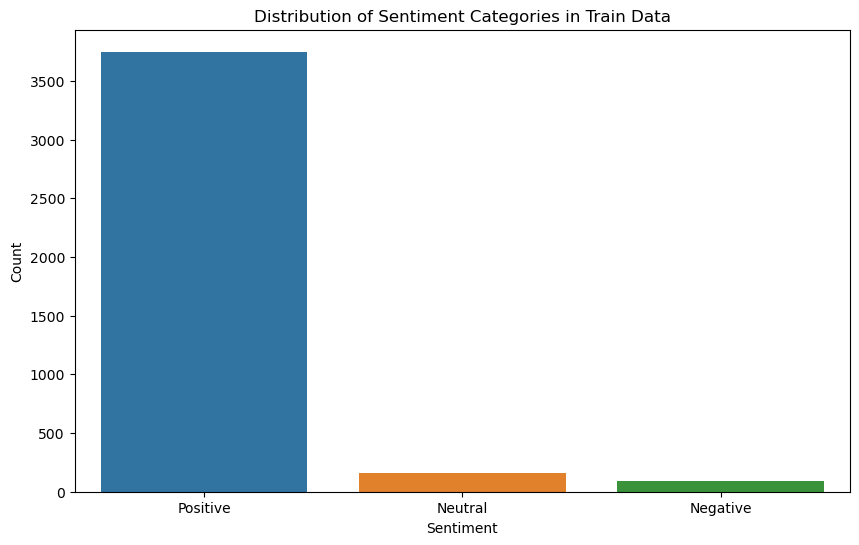

In [14]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='sentiment')
plt.title('Distribution of Sentiment Categories in Train Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Test Data does not contain 'sentiment' column.


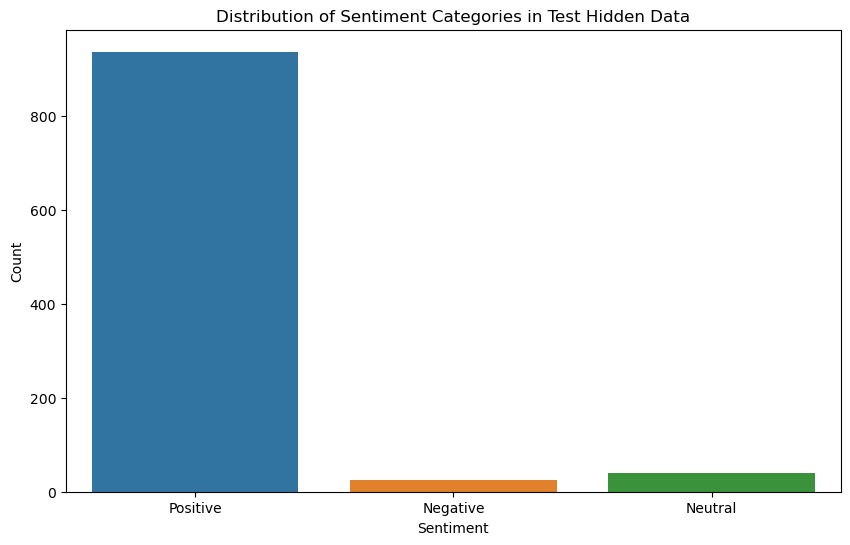

In [15]:
if 'sentiment' in test_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=test_data, x='sentiment')
    plt.title('Distribution of Sentiment Categories in Test Data')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print("Test Data does not contain 'sentiment' column.")

# Visualize the distribution of sentiment categories in test_hidden_data
plt.figure(figsize=(10, 6))
sns.countplot(data=test_hidden_data, x='sentiment')
plt.title('Distribution of Sentiment Categories in Test Hidden Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


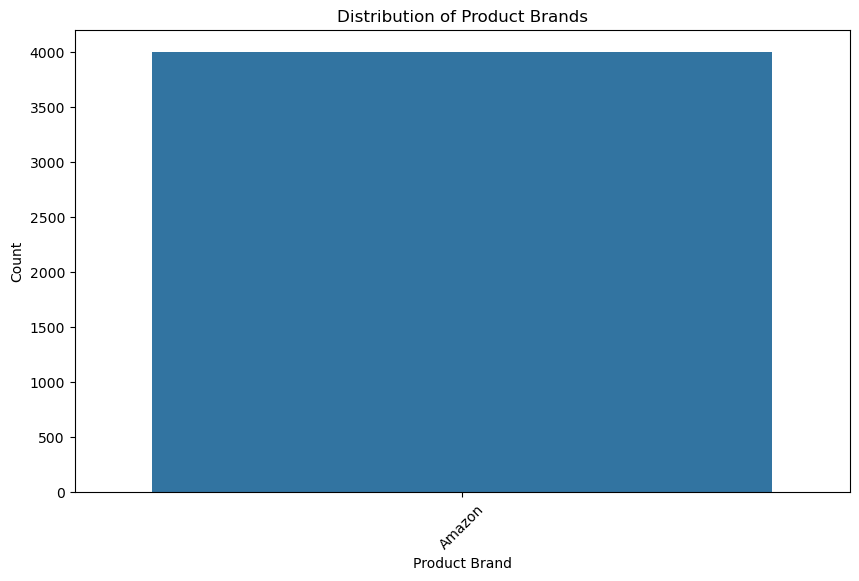

In [16]:
# Distribution of Product Brands
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Product Brand')
plt.title('Distribution of Product Brands')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
train_data

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive


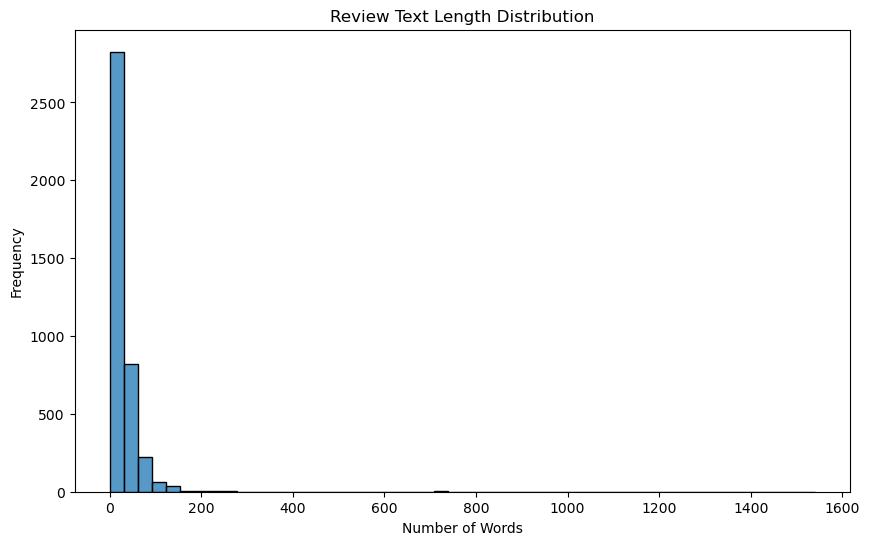

In [18]:
# Review Text Length Distribution
def count_words(text):
    if pd.isna(text):
        return 0
    return len(text.split())

train_data['review_length'] = train_data['reviews.text'].apply(count_words)

plt.figure(figsize=(10, 6))
sns.histplot(train_data['review_length'], bins=50)
plt.title('Review Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

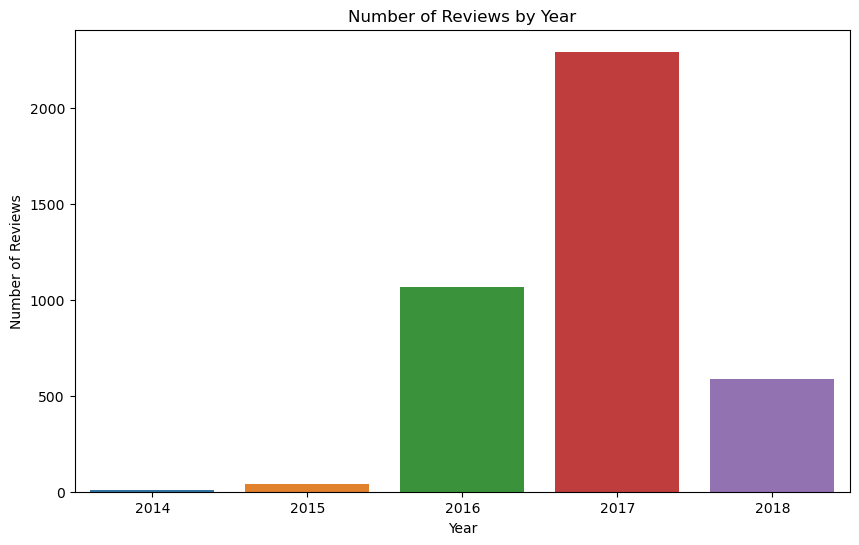

In [19]:
# Temporal Analysis
train_data['reviews.date'] = pd.to_datetime(train_data['reviews.date'])
train_data['year'] = train_data['reviews.date'].dt.year
train_data['month'] = train_data['reviews.date'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='year')
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

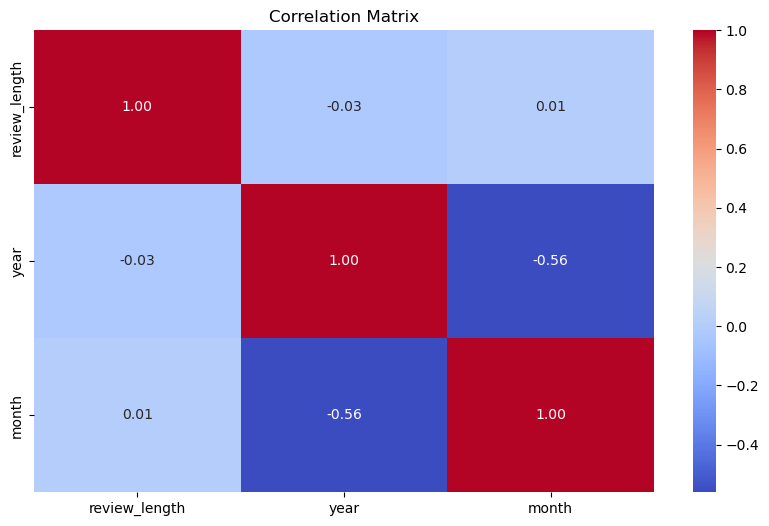

In [20]:
# Correlation Analysis
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numeric_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
pip install wordcloud 

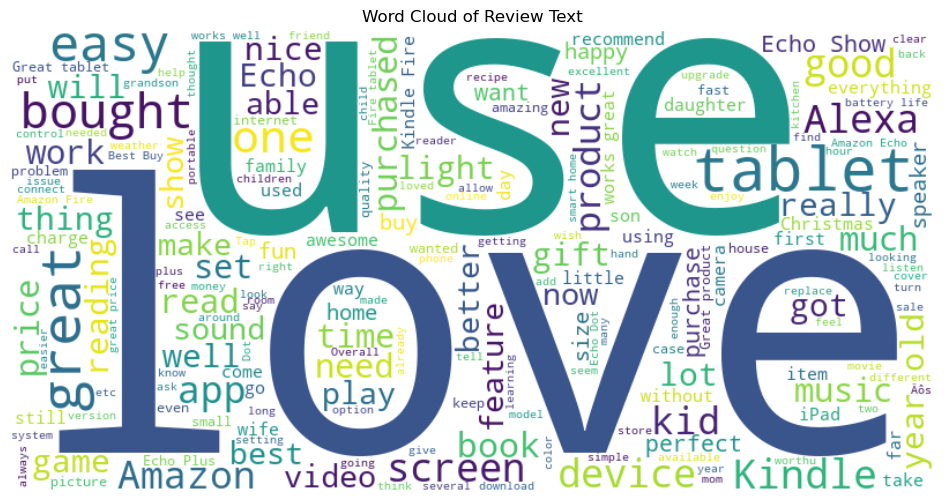

In [22]:
# Word Frequency Analysis
from wordcloud import WordCloud

all_text = ' '.join(train_data['reviews.text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Review Text')
plt.axis('off')
plt.show()

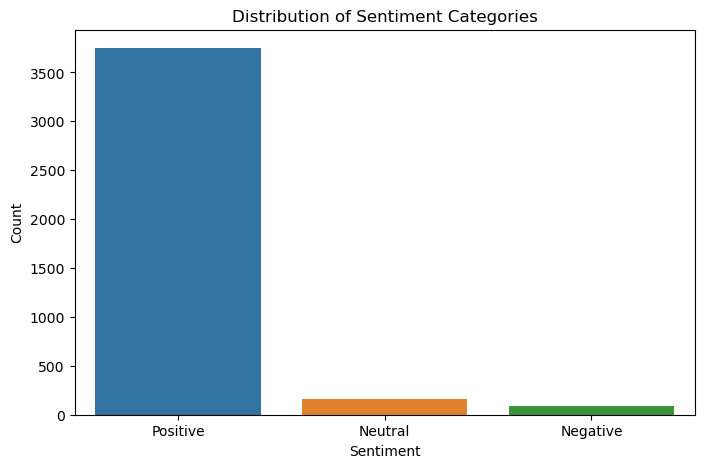

In [23]:
# Class Imbalance Analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='sentiment')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

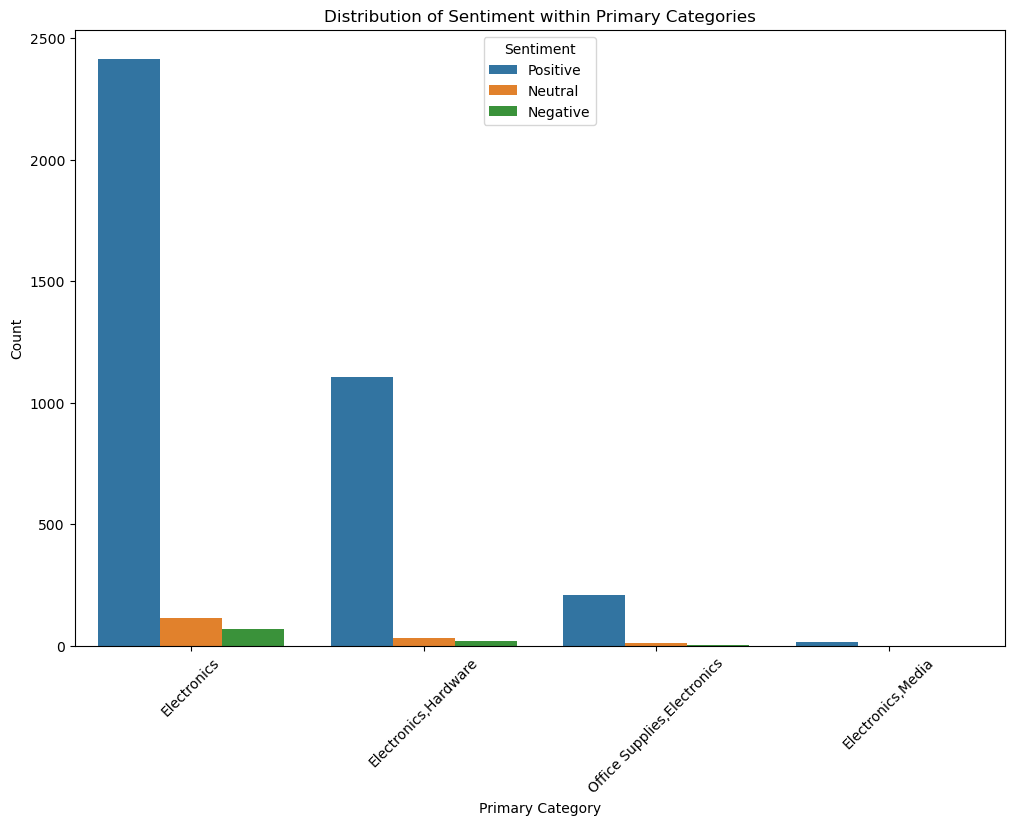

In [24]:
# Distribution of Sentiment within Primary Categories
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='primaryCategories', hue='sentiment')
plt.title('Distribution of Sentiment within Primary Categories')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [25]:
# Function to generate word clouds for each sentiment category within primary categories
def generate_wordclouds(primary_category):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sentiments = train_data['sentiment'].unique()
    for i, sentiment in enumerate(sentiments):
        subset = train_data[(train_data['primaryCategories'] == primary_category) & (train_data['sentiment'] == sentiment)]
        all_text = ' '.join(subset['reviews.title'].dropna().values)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'{sentiment} Sentiment')
        axes[i].axis('off')
    plt.suptitle(f'Review Title Word Clouds for {primary_category}', fontsize=16)
    plt.show()

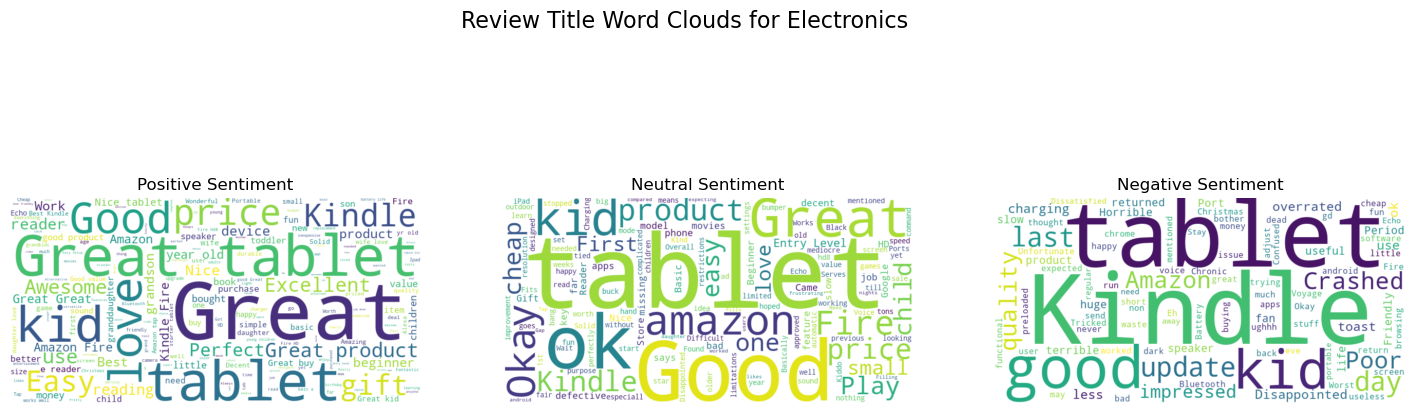

In [26]:
# Generate word clouds for each sentiment category within a specific primary category
primary_category = 'Electronics'
generate_wordclouds(primary_category)

In [27]:
# Examine class counts
sentiment_counts = train_data['sentiment'].value_counts()
print("Class Counts:")
print(sentiment_counts)

Class Counts:
Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64


In [28]:
# Word Frequency Analysis
from collections import Counter

# Combine all review texts for each sentiment category
positive_reviews = ' '.join(train_data[train_data['sentiment'] == 'Positive']['reviews.text'])
negative_reviews = ' '.join(train_data[train_data['sentiment'] == 'Negative']['reviews.text'])
neutral_reviews = ' '.join(train_data[train_data['sentiment'] == 'Neutral']['reviews.text'])

In [29]:
# Count word frequencies
positive_word_freq = Counter(positive_reviews.split())
negative_word_freq = Counter(negative_reviews.split())
neutral_word_freq = Counter(neutral_reviews.split())

In [30]:
positive_word_freq

Counter({'Purchased': 63,
         'on': 849,
         'Black': 22,
         'FridayPros': 1,
         '-': 110,
         'Great': 379,
         'Price': 12,
         '(even': 2,
         'off': 64,
         'sale)Very': 1,
         'powerful': 7,
         'and': 3642,
         'fast': 45,
         'with': 1100,
         'quad': 3,
         'core': 2,
         'processors': 1,
         'Amazing': 7,
         'soundWell': 1,
         'builtCons': 1,
         '-Amazon': 1,
         'ads,': 1,
         'Amazon': 347,
         'need': 127,
         'this': 1351,
         'to': 3617,
         'subsidize': 1,
         'the': 4117,
         'tablet': 635,
         'will': 175,
         'remove': 5,
         'adds': 11,
         'if': 191,
         'you': 646,
         'pay': 18,
         'them': 135,
         '$15.Inability': 1,
         'access': 51,
         'other': 197,
         'apps': 174,
         'except': 10,
         'ones': 14,
         'from': 268,
         'Amazon.': 14,
        

In [31]:
negative_word_freq

Counter({'was': 53,
         'cheap,': 1,
         'can': 8,
         'not': 68,
         'run': 1,
         'chrome': 2,
         'stuff,': 1,
         'returned': 8,
         'to': 141,
         'store.': 2,
         'Worthless,': 1,
         'except': 2,
         'as': 19,
         'a': 89,
         'regular': 2,
         'echo': 7,
         'and': 114,
         'poor': 4,
         'excuse': 1,
         'for': 78,
         'video': 7,
         'chat.': 1,
         'I': 162,
         'love': 3,
         'my': 49,
         'devices,': 1,
         'bathroom,': 1,
         'pool,': 1,
         'kitchen,': 1,
         'other': 7,
         'places': 1,
         'where': 1,
         'may': 4,
         'need': 3,
         'hands': 1,
         'free,': 1,
         'voice': 4,
         'activated': 1,
         'music': 2,
         'info.': 1,
         'My': 13,
         'wife': 1,
         'bought': 19,
         'me': 12,
         'the': 167,
         "'newest,": 1,
         "hottest'": 1,
  

In [32]:
neutral_word_freq

Counter({'Just': 2,
         'an': 30,
         'average': 2,
         'Alexa': 10,
         'option.': 3,
         'Does': 2,
         'show': 7,
         'a': 134,
         'few': 6,
         'things': 8,
         'on': 44,
         'screen': 15,
         'but': 71,
         'still': 11,
         'limited.': 2,
         'My': 11,
         '7-year': 2,
         'old': 14,
         'daughter': 6,
         'saved': 2,
         'up': 24,
         'to': 192,
         'by': 8,
         'this.': 3,
         'Her': 2,
         'brother': 2,
         'bought': 21,
         'the': 225,
         '8GB': 2,
         'about': 12,
         'year': 7,
         'earlier,': 2,
         'so': 30,
         'new': 8,
         'she': 7,
         'needed': 2,
         'more': 16,
         'space.': 2,
         'The': 47,
         'OS': 7,
         'is': 100,
         'bit': 7,
         'clunky,': 2,
         'and': 146,
         'less': 6,
         'intuitive': 3,
         'then': 5,
         'higher': 3,


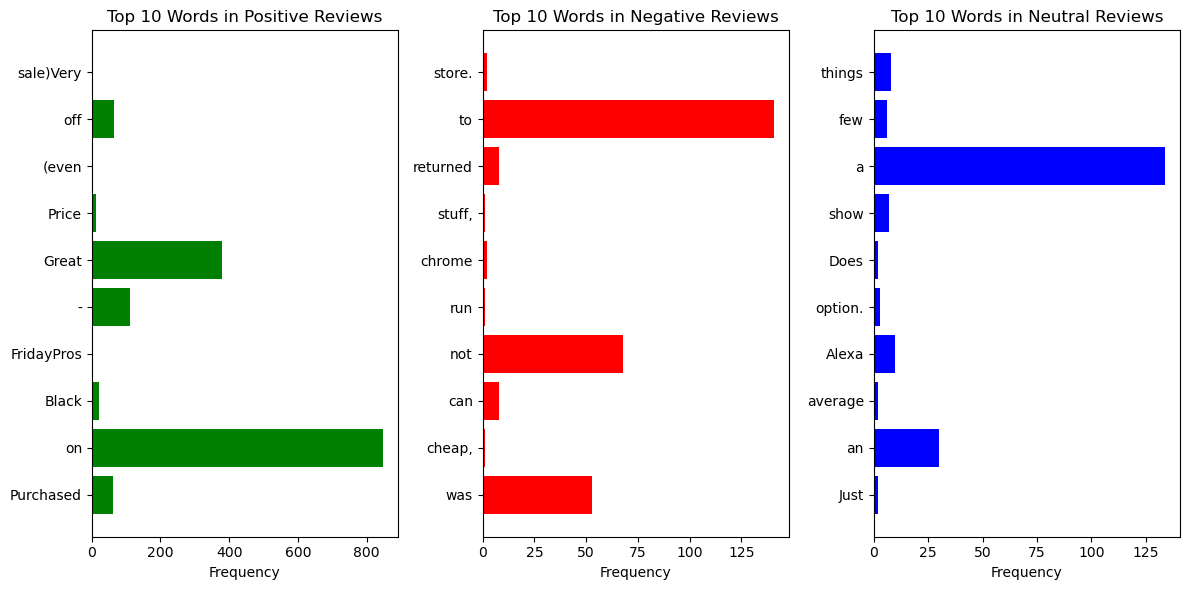

In [33]:
# Visualize word frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.barh(list(positive_word_freq.keys())[:10], list(positive_word_freq.values())[:10], color='green')
plt.title('Top 10 Words in Positive Reviews')
plt.xlabel('Frequency')

plt.subplot(1, 3, 2)
plt.barh(list(negative_word_freq.keys())[:10], list(negative_word_freq.values())[:10], color='red')
plt.title('Top 10 Words in Negative Reviews')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
plt.barh(list(neutral_word_freq.keys())[:10], list(neutral_word_freq.values())[:10], color='blue')
plt.title('Top 10 Words in Neutral Reviews')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

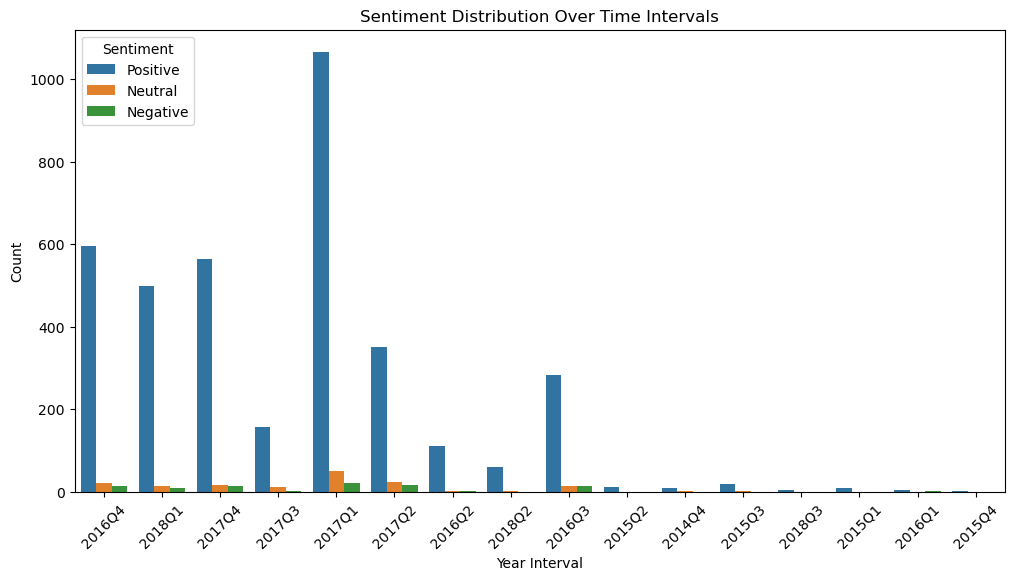

In [34]:
# Time-based Analysis with intervals
train_data['reviews.date'] = pd.to_datetime(train_data['reviews.date'])
train_data['year_interval'] = train_data['reviews.date'].dt.to_period('Q')  # Quarterly intervals
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='year_interval', hue='sentiment')
plt.title('Sentiment Distribution Over Time Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [35]:
# Word Cloud Visualization
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)


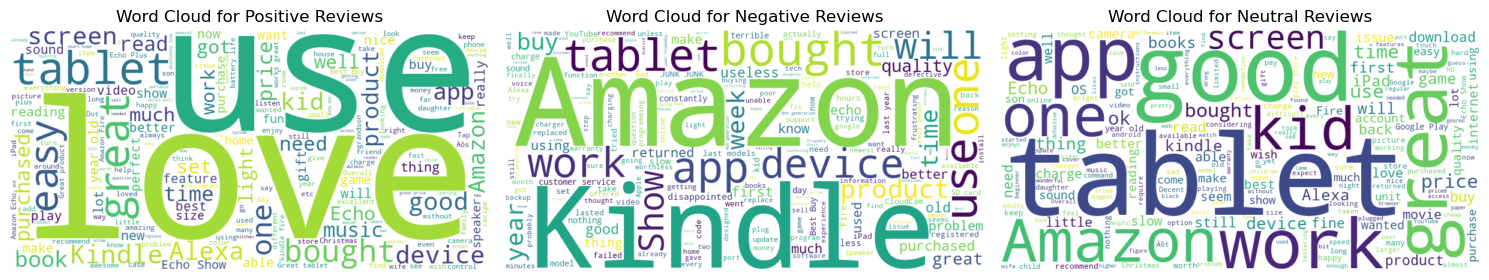

In [36]:
# Plot word clouds
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

In [37]:
from wordcloud import STOPWORDS

Positive words


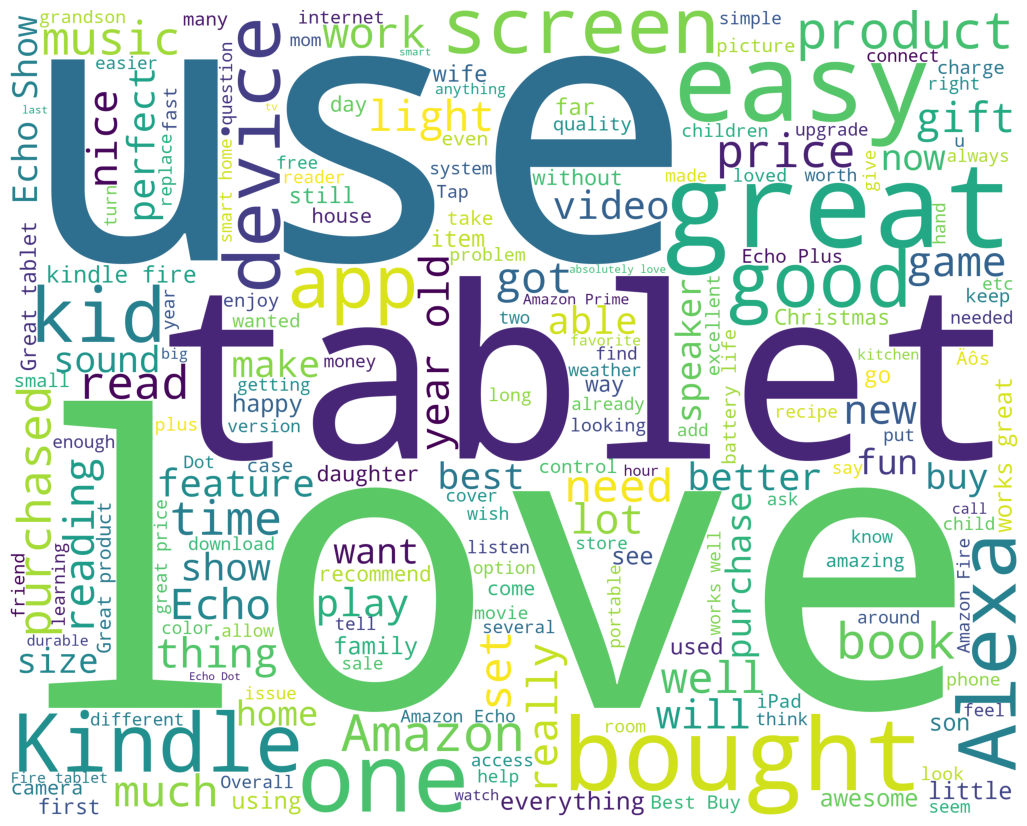

Negative words


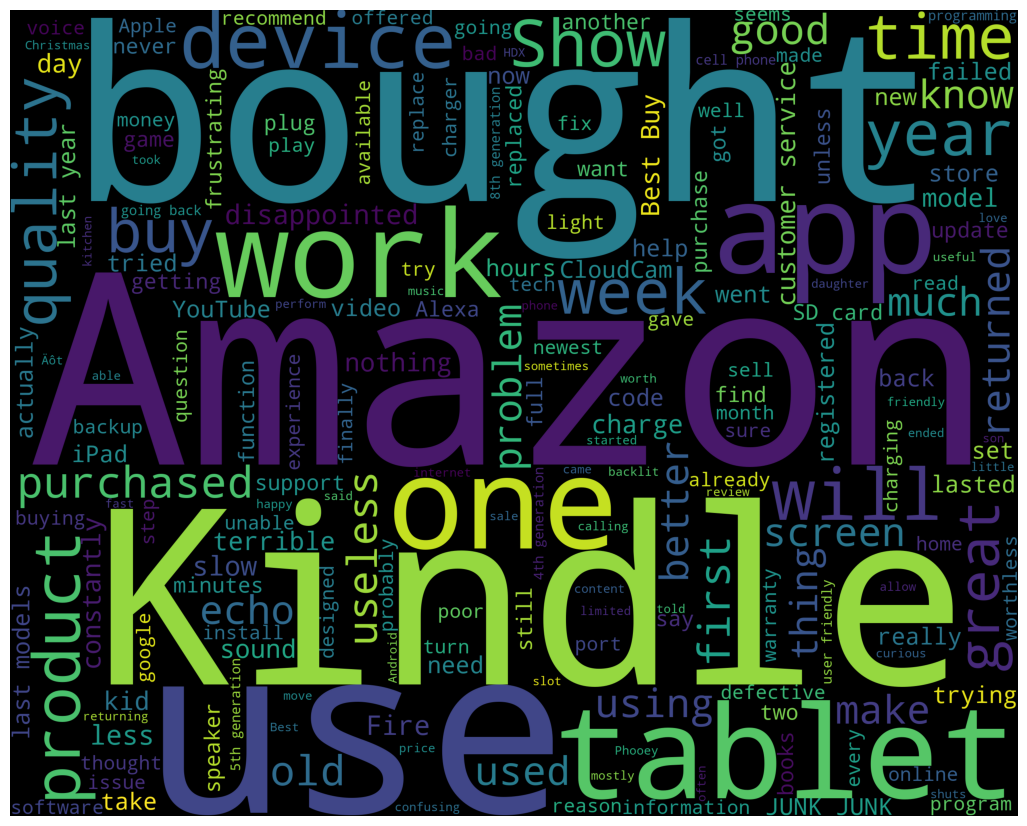

In [38]:
train_pos = train_data[ train_data['sentiment'] == 'Positive']
train_pos = train_pos['reviews.text']
train_neg = train_data[ train_data['sentiment'] == 'Negative']
train_neg = train_neg['reviews.text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

#  Feature Engineering

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize a Tf-Idf vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [40]:
# Concatenate reviews from all datasets and drop missing values
all_reviews = train_data['reviews.text'].dropna().tolist() + test_data['reviews.text'].dropna().tolist() + test_hidden_data['reviews.text'].dropna().tolist()

# Fit the vectorizer on the entire dataset
tfidf_vectorizer.fit(all_reviews)

TfidfVectorizer()

In [41]:
all_reviews

['Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money',
 'I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so happy with these purchases and learning so much with Alexa. You can start your daily routine with Alexa and program it to whatever you would like to include news weather music horoscope ALSO you can start your day off with a compliment and I think is very important. Alexa gave me the BEST CHILI RECIPE I MEAN THE BEST it‚Äôs called Chili I. I want my husband to use Alexa to stay organized for business dates and reminders. This is the 

In [42]:
# Drop rows with missing values in the 'reviews.text' column
train_data.dropna(subset=['reviews.text'], inplace=True)

# Transform the review text into Tf-Idf features for training data
X_train_tfidf = tfidf_vectorizer.transform(train_data['reviews.text'])

In [43]:
# Initialize and fit TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
tfidf_vectorizer.fit(all_reviews)

TfidfVectorizer(max_features=5000)

In [44]:
# Transform review text in training dataset
train_tfidf = tfidf_vectorizer.transform(train_data['reviews.text'])

In [45]:
# Transform review text in test dataset
test_tfidf = tfidf_vectorizer.transform(test_data['reviews.text'])

In [46]:
# Transform review text in test hidden dataset
test_hidden_tfidf = tfidf_vectorizer.transform(test_hidden_data['reviews.text'])

# Classifier Selection

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text in the training data
tfidf_features_train = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix for training data:", tfidf_features_train.shape)


Shape of TF-IDF matrix for training data: (4000, 4897)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text
tfidf_features = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

In [50]:
X = train_data['reviews.text']
y = train_data['sentiment']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (4000, 4897)


# Tackling Class Imbalance

#### Oversampling (SMOTE):

In [51]:
pip install imbalanced-learn

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
# Initialize SMOTE for oversampling
smote = SMOTE()

In [54]:
# Perform oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, train_data['sentiment'])


#### Under-sampling (RandomUnderSampler):

In [55]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
# Initialize RandomUnderSampler for under-sampling
rus = RandomUnderSampler()

In [57]:
# Perform under-sampling on the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_tfidf, train_data['sentiment'])

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the sentiment labels for the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tackle class imbalance using random oversampling
oversampler = RandomOverSampler()
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Train the classifier on the oversampled data
nb_classifier.fit(X_train_oversampled, y_train_oversampled)

# Predict the sentiment labels for the test data using the oversampled classifier
y_pred_oversampled = nb_classifier.predict(X_test)

# Evaluate the oversampled classifier
print("Classification Report (With Random Oversampling):")
print(classification_report(y_test, y_pred_oversampled))

# Tackle class imbalance using random undersampling
undersampler = RandomUnderSampler()
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Train the classifier on the undersampled data
nb_classifier.fit(X_train_undersampled, y_train_undersampled)

# Predict the sentiment labels for the test data using the undersampled classifier
y_pred_undersampled = nb_classifier.predict(X_test)

# Evaluate the undersampled classifier
print("Classification Report (With Random Undersampling):")
print(classification_report(y_test, y_pred_undersampled))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800

Classification Report (With Random Oversampling):
              precision    recall  f1-score   support

    Negative       0.23      0.54      0.32        13
     Neutral       0.25      0.42      0.31        36
    Positive       0.97      0.92      0.94       751

    accuracy                           0.89       800
   macro avg       0.48      0.62      0.52       800
weighted avg       0.93      0.89      0.91       800

Classification Report (With Random Undersampling):
              precision    recall  f1-score   support

    Negative       0.08      0.77      0.15        13
     

**Evaluation Metrics**

In [59]:
# Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [60]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [61]:
# Train_Test_Split
X_train, X_val, y_train, y_val = train_test_split(train_tfidf, train_data['sentiment'], test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = classifier.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       1.00      0.06      0.11        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.65      0.35      0.36       800
weighted avg       0.93      0.94      0.92       800



In [64]:
test_pred = classifier.predict(test_tfidf)

In [65]:
# Evaluate on Test Data (Hidden)
test_hidden_true = test_hidden_data['sentiment']
print(classification_report(test_hidden_true, test_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       1.00      0.03      0.05        39
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.65      0.34      0.34      1000
weighted avg       0.92      0.94      0.91      1000



In [66]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate model using classification report
print(classification_report(test_hidden_true, test_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       1.00      0.03      0.05        39
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.65      0.34      0.34      1000
weighted avg       0.92      0.94      0.91      1000



In [67]:
# Generate predicted probabilities using the model
y_pred_prob = classifier.predict_proba(X_val)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_val, y_pred_prob, multi_class='ovr')
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.9072324309075319


**Multi-class SVM and Neural Nets**

In [68]:
# Preprocessing for training data
X_train = train_data['reviews.text']
y_train = train_data['sentiment']

# Preprocessing for testing data
X_test = test_data['reviews.text']
y_test = test_hidden_data['sentiment']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the review text on the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Split data into training and testing sets

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Check the shape of the TF-IDF matrix for both training and testing data
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_test_final:", X_test_final.shape)


Shape of X_train_final: (3200, 4897)
Shape of X_test_final: (800, 4897)


In [69]:
# Initialize and train the SVM classifier
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_final, y_train_final)

# Predict the sentiment labels for the test data
y_pred_svm = svm_classifier.predict(X_test_final)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(y_test_final, y_pred_svm)

# Compute precision
precision = precision_score(y_test_final, y_pred_svm, average='weighted')

# Compute recall
recall = recall_score(y_test_final, y_pred_svm, average='weighted')

# Compute F1-score
f1 = f1_score(y_test_final, y_pred_svm, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.94875
Precision: 0.9514030934343434
Recall: 0.94875
F1-score: 0.9304529564256034


In [71]:
y_val

555     Positive
3491    Positive
527     Positive
3925    Positive
2989    Positive
          ...   
1922    Negative
865     Positive
3943    Positive
1642    Positive
2483    Positive
Name: sentiment, Length: 800, dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_val is defined somewhere in your code
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels on the training data
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [73]:
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of X_test_final:", X_test_final.shape)
print("Shape of y_val_encoded:", y_val_encoded.shape)

Shape of X_train_final: (3200, 4897)
Shape of y_train_encoded: (4000,)
Shape of X_test_final: (800, 4897)
Shape of y_val_encoded: (800,)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


X_train = train_data['reviews.text']
y_train = train_data['sentiment']


X_test = test_data['reviews.text']
y_test = test_hidden_data['sentiment']

# Handle missing values in the 'reviews.title' column
train_data['reviews.title'].fillna('', inplace=True)
test_data['reviews.title'].fillna('', inplace=True)
test_hidden_data['reviews.title'].fillna('', inplace=True)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the review text on the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels on the training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Split data into training and testing sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Check the shape of the TF-IDF matrix for both training and testing data
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of y_train_final:", y_train_final.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train_final: (3200, 4897)
Shape of y_train_final: (3200,)
Shape of X_val: (800, 4897)
Shape of y_val: (800,)


In [75]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
neural_network_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
neural_network_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Preprocessing for training data
X_train = train_data['reviews.text']
y_train = train_data['sentiment']

# Preprocessing for testing data
X_test = test_data['reviews.text']
y_test = test_hidden_data['sentiment']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the review text on the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Split data into training and testing sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels on the training data
y_train_encoded = label_encoder.fit_transform(y_train_final)
y_val_encoded = label_encoder.transform(y_val)


In [77]:
import scipy.sparse as sp

# Convert dense matrices to sparse format
X_train_sparse = sp.csr_matrix(X_train_final)
X_val_sparse = sp.csr_matrix(X_val)

# Reorder the sparse matrices
X_train_reordered = sp.csr_matrix(X_train_sparse)
X_train_reordered.sort_indices()
X_val_reordered = sp.csr_matrix(X_val_sparse)
X_val_reordered.sort_indices()


history = neural_network_model.fit(X_train_reordered, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val_reordered, y_val_encoded))


Epoch 1/10


100/100 [==============================] - 4s 20ms/step - loss: 0.3959 - accuracy: 0.9325 - val_loss: 0.2376 - val_accuracy: 0.9388
Epoch 2/10
100/100 [==============================] - 2s 19ms/step - loss: 0.1808 - accuracy: 0.9369 - val_loss: 0.1981 - val_accuracy: 0.9388
Epoch 3/10
100/100 [==============================] - 2s 19ms/step - loss: 0.1121 - accuracy: 0.9428 - val_loss: 0.2068 - val_accuracy: 0.9563
Epoch 4/10
100/100 [==============================] - 2s 17ms/step - loss: 0.0537 - accuracy: 0.9897 - val_loss: 0.2512 - val_accuracy: 0.9575
Epoch 5/10
100/100 [==============================] - 2s 17ms/step - loss: 0.0154 - accuracy: 0.9984 - val_loss: 0.3035 - val_accuracy: 0.9588
Epoch 6/10
100/100 [==============================] - 2s 17ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.3301 - val_accuracy: 0.9575
Epoch 7/10
100/100 [==============================] - 2s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3563 - val_accuracy: 0.95

In [78]:
# Evaluate the model on the test data
loss, accuracy = neural_network_model.evaluate(X_test_final, y_val_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

25/25 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.9550
Test Loss: 0.3927
Test Accuracy: 0.9550


**Ensemble Techniques:**

In [79]:
pip install xgboost

In [80]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

# Preprocessing for training data
X_train = train_data['reviews.text']
y_train = train_data['sentiment']

# Preprocessing for testing data
X_test = test_data['reviews.text']
y_test = test_hidden_data['sentiment']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the review text on the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 1: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels on the training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 2: Perform oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train_encoded)

# Step 3: Train a multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Step 4: Train an XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Step 5: Combine the predictions of both classifiers using a voting classifier
voting_classifier = VotingClassifier(estimators=[('nb', nb_classifier), ('xgb', xgb_classifier)], voting='soft')
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the ensemble classifier on the testing data
ensemble_accuracy = voting_classifier.score(X_test_tfidf, label_encoder.transform(y_test))
print("Ensemble Classifier Accuracy:", ensemble_accuracy)


Ensemble Classifier Accuracy: 0.946


In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

from textblob import TextBlob

# Function to calculate sentiment score using TextBlob
def calculate_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Randomly sample a subset of your training data
sample_size = 1000  # Adjust the sample size as needed
random_indices = np.random.choice(len(train_data), size=sample_size, replace=False)
train_data_sampled = train_data.iloc[random_indices]

X_train_text = train_data_sampled['reviews.text']
sentiment_scores_train = [calculate_sentiment_score(text) for text in X_train_text]

X_test_text = test_data['reviews.text']
sentiment_scores_test = [calculate_sentiment_score(text) for text in X_test_text]

# Preprocessing for training data
y_train = train_data_sampled['sentiment']

# Preprocessing for testing data
y_test = test_hidden_data['sentiment']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review text on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# Transform the review text on the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Step 3: Combine TF-IDF features with sentiment scores

X_train_combined = np.hstack((X_train_tfidf.toarray(), np.array(sentiment_scores_train).reshape(-1, 1)))
X_test_combined = np.hstack((X_test_tfidf.toarray(), np.array(sentiment_scores_test).reshape(-1, 1)))

# Step 4: Prepare labels
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 5: LSTM Implementation
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=X_train_combined.shape[1], output_dim=128, input_length=X_train_combined.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_combined, y_train_encoded, epochs=3, batch_size=32, validation_split=0.1)


Epoch 1/3
29/29 [==============================] - 661s 21s/step - loss: 0.4368 - accuracy: 0.9156 - val_loss: 0.1274 - val_accuracy: 0.9900
Epoch 2/3
29/29 [==============================] - 593s 20s/step - loss: 0.3012 - accuracy: 0.9300 - val_loss: 0.0782 - val_accuracy: 0.9900
Epoch 3/3
29/29 [==============================] - 605s 21s/step - loss: 0.3058 - accuracy: 0.9300 - val_loss: 0.1052 - val_accuracy: 0.9900


In [82]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_combined, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


32/32 [==============================] - 32s 995ms/step - loss: 0.2779 - accuracy: 0.9370
Test Loss: 0.27788519859313965, Test Accuracy: 0.9369999766349792


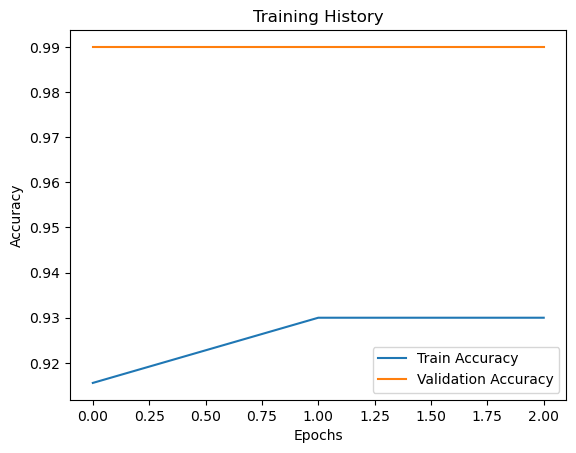

In [83]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()


In [84]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict probabilities for each class
y_pred_prob = model.predict(X_test_combined)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test_encoded, y_pred)
print('Classification Report:')
print(class_report)

32/32 [==============================] - 38s 1s/step
Confusion Matrix:
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

